# K-Means Clustering in OpenCV

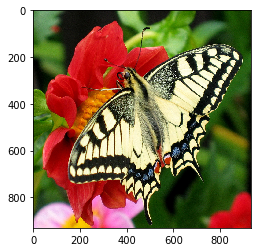

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/butterfly.jpg')

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Prepare Data for K-Means
Reshape image to 2D array of shape (*m*, 3), where *m*=number of pixels in the array and 3 is for the RGB color channels.

Convert pixel values to float type.

In [5]:
pixel_vals = image_copy.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

print(pixel_vals.shape)
print(pixel_vals.dtype)

(866761, 3)
float32


## Implement K-Means Clustering
See: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

In [23]:
def k_means_image(pixel_vals, output_image_shape, k, criteria):
    # cv2.kmeans takes args: 
    # samples, nclusters, labels, stop criteria, attempts, center point method 
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert center points back into 8-bit image
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # reshape segmented data back to original image shape
    segmented_image = segmented_data.reshape((output_image_shape))
    labels_reshape = labels.reshape(output_image_shape[0], output_image_shape[1])
    
    return segmented_image, labels_reshape

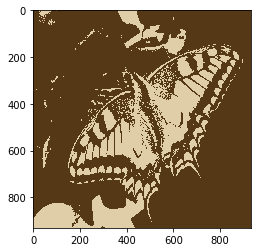

In [24]:
# stopping criteria
# value of epsilon OR max number of iterations
# epsilon = minimum value for clusters to move after an iteration
# max iterations= 10
# epsilon = 1
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
segmented_image, labels = k_means_image(pixel_vals, image_copy.shape, k, criteria)
plt.imshow(segmented_image)

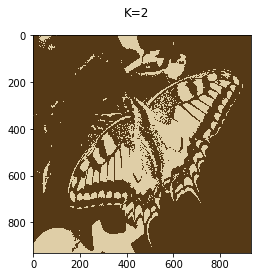

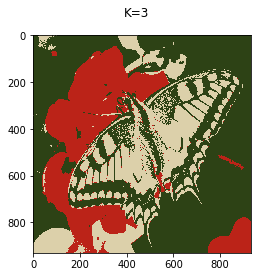

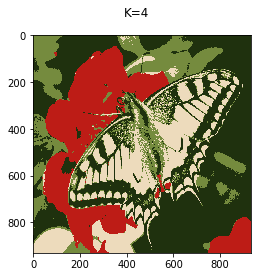

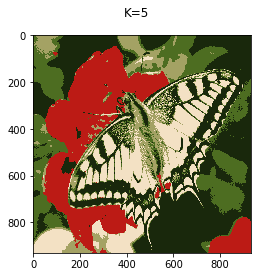

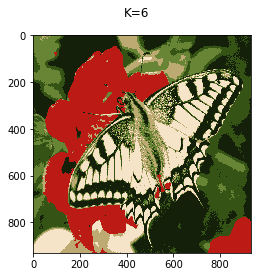

In [33]:
for k in range(2, 7):
    segmented_image, labels = k_means_image(pixel_vals, image_copy.shape, k, criteria)
    fig = plt.figure()
    fig.suptitle('K={}'.format(k))
    plt.imshow(segmented_image)